# Machine Learning and Quantum Computers

### UD2. Classical Neural Networks Exercises

##### Student: 	Pablo Flores Millan


### 1. Single-layer Perceptron

**Let X = [[0, -2],[1, 4],[2, 1],[4, -4],[4, -3],[5, 6],[6, 2]],  y = [1, -1, 1, 1, -1, 1, -1] be the data matrix and the vector of actual labels for a classification problem, respectively.**

1. **Represent the feature vectors in a Cartesian plane. Use different shapes to differentiate among classes: little circles for vectors with “-1” label and plus signs for vectors with “1” label.**

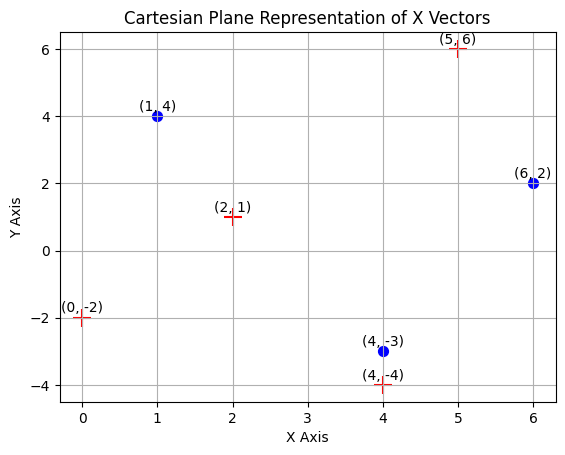

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Defining vectors X and y provided in the question
X = np.array([[0, -2], [1, 4], [2, 1], [4, -4], [4, -3], [5, 6], [6, 2]])
y = np.array([1,-1,1,1,-1,1,-1])

# Extracting the x and y coordinates for the X vectors (Xvect)
x1 = X[:, 0]  # x-coordinates
x2 = X[:, 1]  # y-coordinates

# Distinguishing through the labels provided by the y vector (yvect)
for i, point in enumerate(X):
    plt.annotate(f'({point[0]}, {point[1]})', (x1[i], x2[i]), textcoords="offset points", xytext=(0,4), ha='center')
    if y[i] == 1:
        plt.scatter(x1[i], x2[i], color='red', s=150, marker='+')
    else:
        plt.scatter(x1[i], x2[i], color='blue', s=50, marker='o')

# Plot title and labels
plt.title('Cartesian Plane Representation of X Vectors')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.grid(True)

plt.show()

2. **To separate the data we can use a single-layer perceptron with three neurons (taking the first one as the threshold). Take w0 = [-7,2,1] as an initial weight vector. Draw the straight line that corresponds to this vector, in the same plot you made the previous question.**

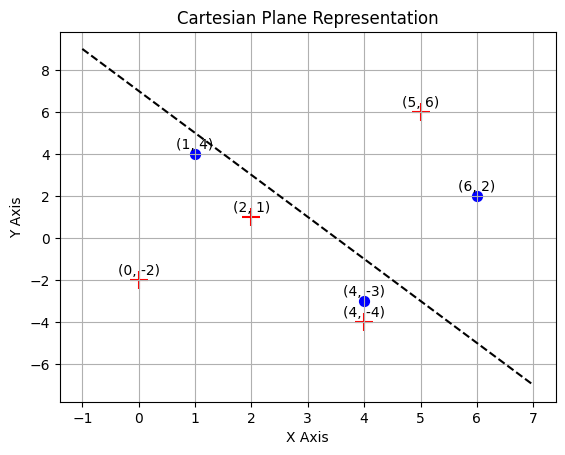

In [7]:
# The initial weights vector w0 provided in the question is:
w_0 = np.array([-7, 2, 1])

# In order to implement the Single-layer Perceptron algorithm, we need to calculate the decision boundary equation.
# In this case, taking Z=[1,z1,z2] as the variable vector (because the first component is the threshold), 
# we obtain the equation: 
# 
#                                                   w0*Z = 0.


# In other words, the decision boundary equation is: w0 + w1*z1 + w2*z2 = 0
# We can rewrite the equation as: z2 = -w0[1]*z1 - w0[0]

# Due to it, we define the decision boundary equation as follows:
x1_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x2_vals = -w_0[1] * x1_vals - w_0[0]  # Calculate x2 using the line equation

# The previously defined plot:
for i, point in enumerate(X):
    plt.annotate(f'({point[0]}, {point[1]})', (x1[i], x2[i]), textcoords="offset points", xytext=(0,4), ha='center')
    if y[i] == 1:
        plt.scatter(x1[i], x2[i], color='red', s=150, marker='+')
    else:
        plt.scatter(x1[i], x2[i], color='blue', s=50, marker='o')

# Plot the decision boundary
plt.plot(x1_vals, x2_vals, label='Decision Boundary', color='black', linestyle='--')

# Add labels and title
plt.title('Cartesian Plane Representation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.grid(True)

# Display the plot
plt.show()

3. **Execute the gradient descent perceptron algorithm for these data and write a table of the weights for subsequent learning epochs.**

In [10]:
# Add a column of 1s to X for the bias term (w0)
X_bias = np.c_[np.ones(X.shape[0]), X]

# Initialize the weight vector with arbitrary values (e.g., zeros or small random values)
w = np.array([0.0, 0.0, 0.0])  # Initial weights (w0, w1, w2)

# Set the learning rate and the number of epochs
eta = 0.1  # Learning rate
epochs = 10  # Number of epochs

# Initialize a list to store the weight values for each epoch
weights_history = []

# Perceptron training with gradient descent
for epoch in range(epochs):
    # Initialize the total error for the epoch
    epoch_error = 0

    # Iterate through each training example
    for i in range(X_bias.shape[0]):
        # Calculate the dot product and make a prediction using the step function
        y_pred = 1 if np.dot(w, X_bias[i]) >= 0 else -1

        # If the prediction is incorrect, update the weights
        if y[i] != y_pred:
            w += eta * (y[i] - y_pred) * X_bias[i]
            epoch_error += 1

    # Save the weight vector for this epoch
    weights_history.append(w.copy())

    # Optionally print the weights at each epoch (can be commented out if not needed)
    print(f"Epoch {epoch+1}: Weights: {w}")

Epoch 1: Weights: [-0.2 -0.8  0.8]
Epoch 2: Weights: [ 0.  -0.8  0.4]
Epoch 3: Weights: [ 0.4 -0.6  0.8]
Epoch 4: Weights: [ 0.6 -0.6  0.4]
Epoch 5: Weights: [ 0.6 -1.4  0.8]
Epoch 6: Weights: [ 0.8 -1.4  0.4]
Epoch 7: Weights: [ 1.2 -1.2  0.8]
Epoch 8: Weights: [ 1.4 -1.2  0.4]
Epoch 9: Weights: [ 1.4 -1.2  0.4]
Epoch 10: Weights: [ 1.4 -1.2  0.4]


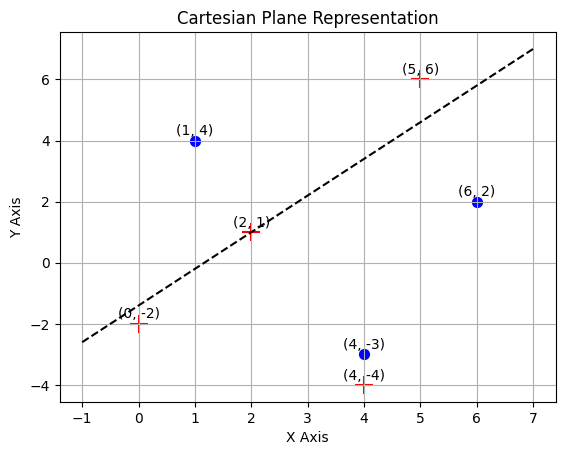

In [11]:
# Due to it, we define the decision boundary equation as follows:
x1_final = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x2_final = -w[1] * x1_final - w[0]  # Calculate x2 using the line equation

# The previously defined plot:
for i, point in enumerate(X):
    plt.annotate(f'({point[0]}, {point[1]})', (x1[i], x2[i]), textcoords="offset points", xytext=(0,4), ha='center')
    if y[i] == 1:
        plt.scatter(x1[i], x2[i], color='red', s=150, marker='+')
    else:
        plt.scatter(x1[i], x2[i], color='blue', s=50, marker='o')

# Plot the decision boundary
plt.plot(x1_final, x2_final, label='Decision Boundary', color='black', linestyle='--')

# Add labels and title
plt.title('Cartesian Plane Representation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.grid(True)

# Display the plot
plt.show()

### 2. Classification

**By using the online simulator https://playground.tensorflow.org answer the following questions (use 20% of training data, 0 noise, sigmoid activation function, no regularisation, and batch size equal to 10).**

1. **Using x1 and x2 as inputs, which of the datasets can be properly classified with one hidden layer. Why?**

We can clearly see that the <u>Exclusive or</u>, <u>Circle</u> and <u>Gaussian</u> data sets can be properly classified with just one hiden layer.

In the case of <u>Exclusive or</u>, and specially <u>Gaussian</u>, this is because they are linearly separable datasets. 

For the <u>Circle</u> one, this is a little more complex, but the main reason resides in the existing separation of the points of the inner and outer circle, allowing topological transformations to be carried out using the radius and the angle that the data form with, for example, the X axis, and thus managing to bring these data to a plane where they are already linear separable.

In the case of <u>Spiral</u> dataset, it can not be properly classified due to its multiple turns and twists, which make it highly complex and extremely non-linear unlike the <u>Circle</u> dataset.

#

2. **How can the first dataset be correctly classified with one hidden layer?**

For the first dataset, <u>Circle</u>, the ideal way would be to be able to make use of x1^2 and x2^2, since a circle can be described as a linear combination of squared terms.

In the case described in the previous section, the ideal would be to increase the number of neurons, since this will help reduce training and test losses.

#

3. **For each dataset, with x1 and x2 as inputs, what is the minimal topology you can find that classifies the data with a training loss smaller than 0.15?**

- <u>Gaussian</u>: Due to its simplicity, it only takes 1 neuron to classify the data with the provided requirements.

- <u>Exclusive or</u> and <u>Circle</u>: In these cases, taking only 3 neurons we can obtain a classification that meets the requirements of the statement.

- <u>Spiral</u>: As we previously commented, this dataset can not be properly classified with just one hidden layer. Performing several tests with 8 neurons, the maximum allowed by the provided web page, we can see that the training loss can be less than 0.17, but it can hardly be less than 0.15.

4. **Find the topology to learn the final classification (the spirals) with the minimum possible inputs. Attach a screenshot of the condition and the final states.**

### 3. Hopfield model

**One simple realisation of the Hopfield model would be a lattice consisting in only four spins.**

1. **Calculate the weights and thresholds to store the following pattern:**

blue orange  
orange blue


In [23]:
import numpy as np

# Defining the pattern to store

# In first place, let us mark the spins are: 
#
# blue = 1
# orange = -1
#
# This way, the provided patern can be written as:
#
#  1  -1
# -1   1

# Writting the pattern as a vector taking into account the spins will provide us with the following array:
pattern = np.array([1, -1, -1, 1])

# where we have the following correspondence:
#
#
#  1  -1     (1   2)
# -1   1     (3   4)

# To calculate the weight matrix, it is important to notice we are storing just one pattern with four spins.
# For this reason, in the formula to calculate the weight we have P=1, N=4.
#
# So, in this case, w_ij = 1/4 * Pi * Pj. 
# 
# To be more specific, we can perform an outer product between the pattern and itself and divide the result by 4.
weight_matrix = 1/4 * np.outer(pattern, pattern)

# Since there are no self-connections, w_ii must be set to 0, i.e, in the weight matrix we have calcaulated
# we should set the diagonal elements to 0 (no self-connections)
np.fill_diagonal(weight_matrix, 0)

# Display the weight matrix
print("Weight matrix (W):")
print(weight_matrix)

# Calculating the threshold:
#
# As we have studied, the threshold is the sum of the weights of the neurons connected to the neuron i.
# So: 

# Initialize an empty list to store the thresholds
thresholds = []

# Calculate the threshold for each neuron
for i in range(4): 
    threshold_i = 1/2 * np.sum(weight_matrix[i])
    thresholds.append(threshold_i)  # Append the threshold to the list

# To convert the list to as an array  in order to print it:
thresholds = np.array(thresholds)
print("Thresholds for all neurons:", thresholds)


Weight matrix (W):
[[ 0.   -0.25 -0.25  0.25]
 [-0.25  0.    0.25 -0.25]
 [-0.25  0.25  0.   -0.25]
 [ 0.25 -0.25 -0.25  0.  ]]
Thresholds for all neurons: [-0.125 -0.125 -0.125 -0.125]


2. **Calculate the evolution of the system until it reaches a steady state if you start with the following pattern (use asynchronous updating of the spins, T=0).**

blue orange  
blue blue


In [37]:
# Let us start by defining the initial state of the network as the pattern we want to store.
# 
# Considering the spins are:
# blue = 1
# orange = -1
#
# the provided patern can be written as:
#
#  1  -1
# 1   1
# 
# This way, the initial state of the network can be written as:
initial_state = np.array([1, -1, 1, 1])


# Define the update rule for the Hopfield network
def update_state(state, weight_matrix):
    new_state = state.copy()
    
    for i in range(4):
        input_sum = np.dot(weight_matrix[i], new_state) - thresholds[i]
        new_state[i] = 1 if input_sum > 0 else -1
    
    return new_state

# Define a function to evolve the Hopfield network until it reaches a steady state
def evolve_system(initial_state, weight_matrix, max_iterations=100):
    state = initial_state.copy()
    iteration = 0
    
    while iteration < max_iterations:
        new_state = update_state(state, weight_matrix)
        if np.array_equal(state, new_state):
            break
        
        state = new_state
        iteration += 1
    
    return state

# Evolve the system
final_state = evolve_system(initial_state, weight_matrix)

# Display the result
print("\nInitial state:")
print(initial_state)

print("\nFinal steady state:")
print(final_state)



Initial state:
[ 1 -1  1  1]

Final steady state:
[ 1 -1 -1  1]


In [ ]:
# This cell is only to show some changes in the code from the GitHub report

print("This is a test to show the changes in the code from my GitHub report")

import pandas as pd